In [1]:
import matplotlib

import matplotlib.pyplot as plt

import os
import torch 
import numpy as np
import copy
import importlib

import data
import tools
import arguments
from model import Model
import argparse

In [13]:
# Inspect baseline models: 'straight' and 'random' action
parser = argparse.ArgumentParser()
parser=arguments.add_arguments(parser)
FLAGS, others = parser.parse_known_args()
FLAGS.dataset='esatv3_expert/labels'
data.prepare_data(FLAGS)

[data] 00001_esatv3
[data] 00002_esatv3
[data] 00000_esatv3
[data] 00003_esatv3
[data] flying_2_subsampled
[data] flying_1_subsampled


In [14]:
data.full_set.keys()

dict_keys(['train', 'validation', 'test'])

In [15]:
data.full_set
for dtype in ['validation', 'test']:
    loss=0
    straight=0
    total=0
    for run in data.full_set[dtype]:
        total+=len(run['controls'])
        straight+=len([c for c in run['controls'] if c==0])
        loss+=sum([c**2 for c in run['controls']])

    print(dtype, straight, total, straight/float(total), loss/float(total))

validation 1819 2507 0.7255684084563223 0.22228958915037825
test 1346 1663 0.809380637402285 0.09340348767288012


In [33]:
# Create settings
parser = argparse.ArgumentParser()
parser=arguments.add_arguments(parser)
FLAGS, others = parser.parse_known_args()
# Adjust settings
FLAGS.dataset = 'esatv3_expert/transferred_reference'
FLAGS.log_tag = 'test_interactively'
FLAGS.checkpoint_path = 'chapter_domain_shift/auxiliarydepth/auxiliarydepth/learning_rates/lr_01'
FLAGS.batch_size = 32
if FLAGS.summary_dir[0] != '/': 
    FLAGS.summary_dir = os.path.join(os.getenv('HOME'),FLAGS.summary_dir)
if len(FLAGS.checkpoint_path) != 0 and FLAGS.checkpoint_path[0] != '/': 
    FLAGS.checkpoint_path = os.path.join(FLAGS.summary_dir, FLAGS.checkpoint_path) 
if not os.path.isdir(FLAGS.summary_dir+FLAGS.log_tag): 
    os.makedirs(FLAGS.summary_dir+FLAGS.log_tag)
FLAGS=tools.load_config(FLAGS, FLAGS.checkpoint_path)

# Load a model
mymodel = Model(FLAGS)

[tools] Load configuration from:  /esat/opal/kkelchte/docker_home/tensorflow/log/chapter_domain_shift/auxiliarydepth/auxiliarydepth/learning_rates/lr_01
set: action_bound 0.9
set: auxiliary_depth True
set: depth_multiplier 0.25
set: discrete False
set: n_frames 2
set: network res18_net
set: normalized_input False
set: scaled_input True
set: skew_input False
set: speed 0.8
set: stochastic False
set: turn_speed 0.8
[model] Total number of trainable parameters: 11177025
[model]: loaded model from /esat/opal/kkelchte/docker_home/tensorflow/log/chapter_domain_shift/auxiliarydepth/auxiliarydepth/learning_rates/lr_01 at epoch: 10000
[model]: loaded auxiliary_net from /esat/opal/kkelchte/docker_home/tensorflow/log/chapter_domain_shift/auxiliarydepth/auxiliarydepth/learning_rates/lr_01 at epoch: 10000
[model]: loaded optimizer parameters from /esat/opal/kkelchte/docker_home/tensorflow/log/chapter_domain_shift/auxiliarydepth/auxiliarydepth/learning_rates/lr_01


In [84]:
FLAGS.dataset = 'esatv3_expert/transferred_reference'
FLAGS.load_data_in_ram=True
data.prepare_data(FLAGS, mymodel.input_size, datatypes=['train'])
# data.prepare_data(FLAGS, mymodel.input_size, datatypes=['test'])


[data] 00002_esatv3
[data] 00001_esatv3
[data] 00000_esatv3


In [36]:
FLAGS.checkpoint_path = ''
mymodel = Model(FLAGS)

[model] Total number of trainable parameters: 11177025
[model]: initialized model from scratch


In [78]:
FLAGS.checkpoint_path = FLAGS.summary_dir+'chapter_domain_shift/auxiliarydepth/auxiliarydepth/learning_rates/lr_01'
checkpoint=torch.load(FLAGS.checkpoint_path+'/my-model')
checkpoint['model_state_dict']['network.conv1.weight']

tensor([[[[-2.1884e-03, -4.1681e-03,  6.1837e-03,  ...,  6.1654e-02,
            1.5758e-02, -4.9811e-03],
          [ 8.6940e-03,  5.3395e-03, -1.1016e-01,  ..., -2.7451e-01,
           -1.3404e-01,  6.8181e-03],
          [-6.9593e-03,  5.5496e-02,  2.9193e-01,  ...,  5.2028e-01,
            2.5549e-01,  6.5278e-02],
          ...,
          [-2.0168e-02,  1.3360e-02,  7.3792e-02,  ..., -3.3502e-01,
           -4.2693e-01, -2.6260e-01],
          [ 3.4283e-02,  3.5981e-02,  6.4160e-02,  ...,  4.1061e-01,
            3.9034e-01,  1.6305e-01],
          [-8.4884e-03, -4.3120e-03, -1.9537e-02,  ..., -1.5128e-01,
           -8.3920e-02, -9.9084e-03]],

         [[-8.1778e-03, -2.4941e-02, -2.8802e-02,  ...,  3.5881e-02,
           -1.2299e-03, -1.6409e-02],
          [ 3.8994e-02,  2.9635e-02, -1.0488e-01,  ..., -3.1749e-01,
           -1.6688e-01,  3.6526e-03],
          [-6.6138e-03,  9.4486e-02,  3.9865e-01,  ...,  7.0584e-01,
            3.6466e-01,  1.2751e-01],
          ...,
     

In [79]:
mymodel.net.state_dict()['network.conv1.weight']

tensor([[[[-2.1884e-03, -4.1681e-03,  6.1837e-03,  ...,  6.1654e-02,
            1.5758e-02, -4.9811e-03],
          [ 8.6940e-03,  5.3395e-03, -1.1016e-01,  ..., -2.7451e-01,
           -1.3404e-01,  6.8181e-03],
          [-6.9593e-03,  5.5496e-02,  2.9193e-01,  ...,  5.2028e-01,
            2.5549e-01,  6.5278e-02],
          ...,
          [-2.0168e-02,  1.3360e-02,  7.3792e-02,  ..., -3.3502e-01,
           -4.2693e-01, -2.6260e-01],
          [ 3.4283e-02,  3.5981e-02,  6.4160e-02,  ...,  4.1061e-01,
            3.9034e-01,  1.6305e-01],
          [-8.4884e-03, -4.3120e-03, -1.9537e-02,  ..., -1.5128e-01,
           -8.3920e-02, -9.9084e-03]],

         [[-8.1778e-03, -2.4941e-02, -2.8802e-02,  ...,  3.5881e-02,
           -1.2299e-03, -1.6409e-02],
          [ 3.8994e-02,  2.9635e-02, -1.0488e-01,  ..., -3.1749e-01,
           -1.6688e-01,  3.6526e-03],
          [-6.6138e-03,  9.4486e-02,  3.9865e-01,  ...,  7.0584e-01,
            3.6466e-01,  1.2751e-01],
          ...,
     

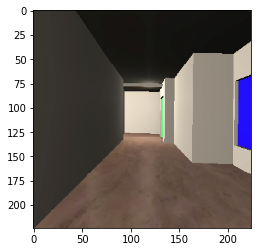

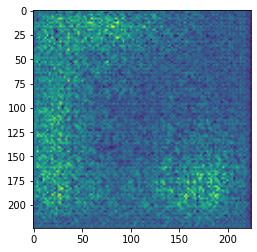

In [86]:
test_img=data.full_set['train'][0]['imgs'][1000]
plt.imshow(tools.post_process(FLAGS,test_img))
plt.show()
inputs=torch.from_numpy(np.asarray(test_img)).unsqueeze(0).type(torch.FloatTensor).to(mymodel.device)
feature=mymodel.net.feature(inputs)
result=mymodel.auxiliary_net(feature).cpu().detach().numpy()
plt.imshow(result[0,:,:])
plt.show()

In [6]:
FLAGS.scratch = True
FLAGS.network = 'small'

In [7]:
# Load model in tensorflow session
config=tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
model = Model(FLAGS, sess)

UnboundLocalError: local variable 'logits' referenced before assignment

In [3]:
# Settings depth-q-learning
FLAGS = tf.app.flags.FLAGS
FLAGS.learning_rate=0.1
FLAGS.data_format='NHWC'
FLAGS.batch_size=10
FLAGS.depth_multiplier=0.25
FLAGS.continue_training=True
FLAGS.network='depth_q_net'
FLAGS.depth_q_learning=True
FLAGS.n_fc=False
FLAGS.summary_dir='/esat/qayd/kkelchte/docker_home/tensorflow/log/'
FLAGS.log_tag='testing_interactive'
FLAGS.random_seed=1534
FLAGS.checkpoint_path="depth_q_net_canyon"
FLAGS.auxiliary_depth=False
FLAGS.plot_depth=False

In [4]:
# Loading model
action_dim = 1  
config=tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

model = Model(sess, action_dim)

data_format: NHWC
checkpoint: /esat/qayd/kkelchte/docker_home/tensorflow/log/depth_q_net_canyon
Successfully loaded model from:/esat/qayd/kkelchte/docker_home/tensorflow/log/depth_q_net_canyon


In [83]:
# Preparing data
FLAGS.data_root="/esat/qayd/kkelchte/docker_home/pilot_data"
# FLAGS.dataset="doshico"
# FLAGS.dataset="canyon_forest_sandbox"
FLAGS.dataset="canyon"
data.prepare_data((model.input_size[1], model.input_size[2], model.input_size[3]))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

from PIL import Image

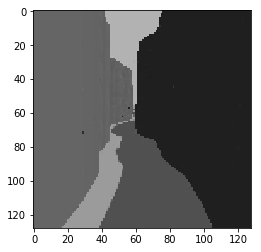

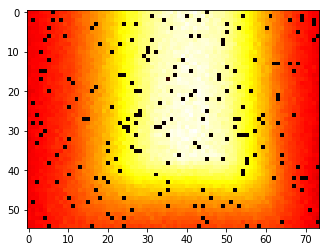

right min: 0.357712417841, avg: 3.47164583206


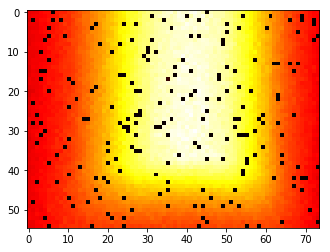

straight min: 0.360431849957, avg: 3.46398019791


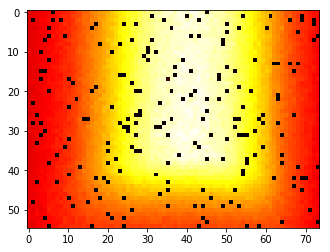

left min: 0.361778527498, avg: 3.45804715157
right


In [131]:
# Test on training data
data_type='test'
control_map={-1:'right',0:'straight',1:'left'}
# correct=0
# total=0
for index, ok, batch in data.generate_batch(data_type):
#     for b in batch:
        if batch[0]['ctr'] == -1: label = 'right'
        elif batch[0]['ctr'] == 1: label = 'left'
        else: label = 'straight'
        
#         plt.imshow(batch[0]['depth'], cmap='hot')
#         plt.show()
        plt.imshow(batch[0]['img']*255)
        plt.show()
        
        # right
        result, losses, aux_res = model.forward([batch[0]['img']], actions=[[1]])
        plt.imshow(result[0], cmap='hot')
        plt.show()
        print("{0} min: {1}, avg: {2}".format('right', np.amin(result[0][result[0]!=0]), np.mean(result[0][result[0]!=0])))
        # straight
        result, losses, aux_res = model.forward([batch[0]['img']], actions=[[0]])
        plt.imshow(result[0], cmap='hot')
        plt.show()
        print("{0} min: {1}, avg: {2}".format('straight', np.amin(result[0][result[0]!=0]), np.mean(result[0][result[0]!=0])))
        # left
        result, losses, aux_res = model.forward([batch[0]['img']], actions=[[-1]])
        plt.imshow(result[0], cmap='hot')
        plt.show()
        print("{0} min: {1}, avg: {2}".format('left', np.amin(result[0][result[0]!=0]), np.mean(result[0][result[0]!=0])))
        
        
        print("{0}".format(label))
        break
#         total +=1
#         if batch[0]['ctr']==np.argmax(q_values)-1: correct += 1


left
left: 525.549019608 right: 488.941176471
(14, 19)
(128, 128, 3)


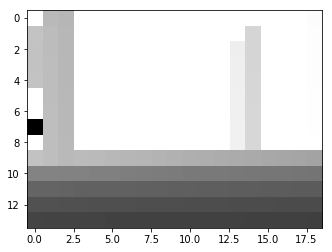

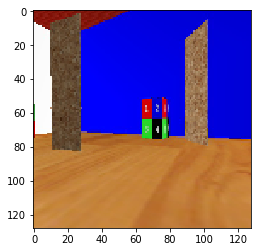

14.0
19.0


In [8]:
data_type='train'
for index, ok, batch in data.generate_batch(data_type):
    de=batch[0]['depth'][::4,::4]
    de[de==0]=5
    im=batch[0]['img']*255
#     im=im[::4,::4,:]
    de_pruned_left=de[:,0:10]
    de_pruned_left[de_pruned_left==0]=5
    de_pruned_right=de[:,10:]
    de_pruned_right[de_pruned_right==0]=5
    print("right" if sum(sum(de_pruned_left))<sum(sum(de_pruned_right)) else "left" )
    print("left: {0} right: {1}".format(sum(sum(de_pruned_left)),sum(sum(de_pruned_right))))
    print de.shape
    print im.shape
    plt.imshow(de, cmap='gray')
    plt.show()
    plt.imshow(im)
    plt.show()
    break
print str(np.ceil(55/4.))
print str(np.ceil(74/4.))


In [9]:
messages=[]
res=[]
for _ in range(20):
    # Test on almost collision dataset: 44% accuracy 
    # mean:44.034591195, var:0.914629563704, min:41.7610062893, max:45.7232704403
    # Pick right action according to summing over different regions
    data_type='test'
    correct=0
    total=0
    for index, ok, batch in data.generate_batch(data_type):
        actions=[[b['ctr']] for b in batch]
        result, losses, aux_res = model.forward([b['img'] for b in batch], actions=actions)   
        for i, r in enumerate(result):
    #         plt.imshow(batch[0]['img']*255)
    #         plt.show()        
    #         plt.imshow(r)
    #         plt.show()
    #         parts=[r[:,int(r.shape[1]*2/3):],
    #                r[:,int(r.shape[1]/3):int(2*r.shape[1]/3)],
    #                r[:,0:int(r.shape[1]/3)]]
            parts=[r[:,20:],
                   r[:,int(r.shape[1]/2-10):int(r.shape[1]/2+10)],
                   r[:,0:20]]

            q_values=[sum(sum(p)) for p in parts]
            total +=1
    #         print "q_values {0} \n pred: {1} \n correct action {2} \n --> {3}".format(q_values, np.argmax(q_values)-1, actions[i], 'correct' if actions[i]==np.argmax(q_values)-1 else 'wrong')

            if actions[i]==np.argmax(q_values)-1: 
                correct += 1
    #         break
    #     break
    res.append(100*correct/float(total))
    messages.append("{0}/{1}={2:.02f}".format(correct, total, 100*correct/float(total)))

for m in messages: print m

print("mean:{0}, var:{1}, min:{2}, max:{3}".format(np.mean(res), np.var(res), min(res), max(res)))
    

batch 10 of 144
batch 20 of 144
batch 30 of 144
batch 40 of 144
batch 50 of 144
batch 60 of 144
batch 70 of 144
batch 80 of 144
batch 90 of 144
batch 100 of 144
batch 110 of 144
batch 120 of 144
batch 130 of 144
batch 140 of 144
batch 10 of 144
batch 20 of 144
batch 30 of 144
batch 40 of 144
batch 50 of 144
batch 60 of 144
batch 70 of 144
batch 80 of 144
batch 90 of 144
batch 100 of 144
batch 110 of 144
batch 120 of 144
batch 130 of 144
batch 140 of 144
batch 10 of 144
batch 20 of 144
batch 30 of 144
batch 40 of 144
batch 50 of 144
batch 60 of 144
batch 70 of 144
batch 80 of 144
batch 90 of 144
batch 100 of 144
batch 110 of 144
batch 120 of 144
batch 130 of 144
batch 140 of 144
batch 10 of 144
batch 20 of 144
batch 30 of 144
batch 40 of 144
batch 50 of 144
batch 60 of 144
batch 70 of 144
batch 80 of 144
batch 90 of 144
batch 100 of 144
batch 110 of 144
batch 120 of 144
batch 130 of 144
batch 140 of 144
batch 10 of 144
batch 20 of 144
batch 30 of 144
batch 40 of 144
batch 50 of 144
batc

In [157]:
res=[]
messages=[]
for _ in range(20):
    # Test on almost collision dataset: mean:57.7830188679, var:1.15338594201, min:55.7232704403, max:59.1823899371
    data_type='test'
    correct=0
    total=0
    for index, ok, batch in data.generate_batch(data_type):
        # plt.imshow(batch[0]['img']*255)
        # plt.show() 
        q_values=[]
        result, losses, aux_res = model.forward([b['img'] for b in batch], actions=[[-1] for b in batch])
        # plt.imshow(result[0])
        # plt.show()

        q_values.append([sum(r[r!=0]) for r in result])
        result, losses, aux_res = model.forward([b['img'] for b in batch], actions=[[0] for b in batch])
        # plt.imshow(result[0])
        # plt.show()

        q_values.append([sum(r[r!=0]) for r in result])
        result, losses, aux_res = model.forward([b['img'] for b in batch], actions=[[1] for b in batch])
        # plt.imshow(result[0])
        # plt.show()

        q_values.append([sum(r[r!=0]) for r in result])
        
#         print q_values
        
        for i in range(len(batch)):
            total+=1
            qs=[q_values[0][i], q_values[1][i], q_values[2][i]]
            if batch[i]['ctr']==np.argmax(qs)-1: correct +=1
#             print "GT: {0} Q-ES: {1} --> {2}".format(batch[i]['ctr'], np.argmax(qs)-1, 'correct' if batch[i]['ctr']==np.argmax(qs)-1 else 'wrong')
#             break
#         break
#     break
    res.append(100*correct/float(total))
    messages.append("{0}/{1}={2:.02f}".format(correct, total, 100*correct/float(total)))


for m in messages: print m

print("mean:{0}, var:{1}, min:{2}, max:{3}".format(np.mean(res), np.var(res), min(res), max(res)))


batch 10 of 159
batch 20 of 159
batch 30 of 159
batch 40 of 159
batch 50 of 159
batch 60 of 159
batch 70 of 159
batch 80 of 159
batch 90 of 159
batch 100 of 159
batch 110 of 159
batch 120 of 159
batch 130 of 159
batch 140 of 159
batch 150 of 159
batch 10 of 159
batch 20 of 159
batch 30 of 159
batch 40 of 159
batch 50 of 159
batch 60 of 159
batch 70 of 159
batch 80 of 159
batch 90 of 159
batch 100 of 159
batch 110 of 159
batch 120 of 159
batch 130 of 159
batch 140 of 159
batch 150 of 159
batch 10 of 159
batch 20 of 159
batch 30 of 159
batch 40 of 159
batch 50 of 159
batch 60 of 159
batch 70 of 159
batch 80 of 159
batch 90 of 159
batch 100 of 159
batch 110 of 159
batch 120 of 159
batch 130 of 159
batch 140 of 159
batch 150 of 159
batch 10 of 159
batch 20 of 159
batch 30 of 159
batch 40 of 159
batch 50 of 159
batch 60 of 159
batch 70 of 159
batch 80 of 159
batch 90 of 159
batch 100 of 159
batch 110 of 159
batch 120 of 159
batch 130 of 159
batch 140 of 159
batch 150 of 159
batch 10 of 159


In [ ]:
# Test on almost collision dataset: 59.3% accuracy
data_type='test'
correct=0
total=0
for index, ok, batch in data.generate_batch(data_type):
    for b in batch:
        result, losses, aux_res = model.forward([batch[0]['img']], actions=[[0]])   
        total +=1
        if batch[0]['ctr']==np.argmax(q_values)-1: correct += 1
        
print("{0}/{1}".format(correct, total))

(128, 128, 3)
0.0674614
1.97798
0.893229
GT: 1.0 Q-ES: 1 --> correct


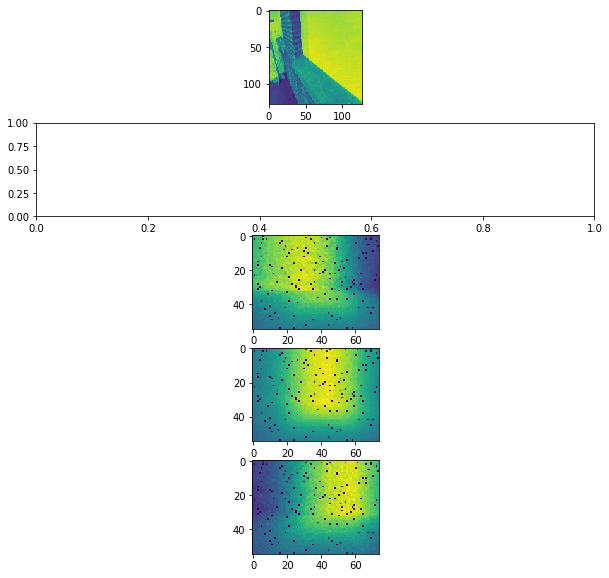

In [21]:
# Load a batch and display results
data_type='test'
f, ax = plt.subplots(5, figsize=(10,10))
for index, ok, batch in data.generate_batch(data_type):
#     ax[0].imshow(cv2.cvtColor(batch[0]['img'], cv2.COLOR_BGR2RGB))
    print batch[0]['img'].shape
    ax[0].imshow(batch[0]['img'][:,:,0])
#     ax[1].imshow(batch[0]['depth'])
    q_values=[]
    result, losses, aux_res = model.forward([batch[0]['img']], actions=[[10]])
    ax[2].imshow(result[0])
    print min(result[result!=0])
    
    q_values.append(sum(result[result!=0]))
    
    result, losses, aux_res = model.forward([batch[0]['img']], actions=[[0]])
    ax[3].imshow(result[0])
    q_values.append(sum(result[result!=0]))
    print min(result[result!=0])
    
    result, losses, aux_res = model.forward([batch[0]['img']], actions=[[-10]])
    q_values.append(sum(result[result!=0]))
    ax[4].imshow(result[0])
    print min(result[result!=0])

    print "GT: {0} Q-ES: {1} --> {2}".format(batch[0]['ctr'], np.argmax(q_values)-1, 'correct' if batch[0]['ctr']==np.argmax(q_values)-1 else 'wrong')

    break
plt.show()

In [39]:
sum(result[result!=0])

11443.861469984055

15520.3
[[[ 1.7027353   1.84683192  1.54338682 ...,  3.22902703  2.83582377
    3.25331044]
  [ 1.27274919  1.66538739  1.75851655 ...,  3.19417214  2.95188355
    2.88876462]
  [ 1.44272661  0.          1.53400648 ...,  3.05596113  0.          2.72797632]
  ..., 
  [ 1.67741632  1.77398622  2.03700972 ...,  3.12999654  2.54793453
    2.86266398]
  [ 1.56576312  1.72361612  1.63785088 ...,  2.59515762  2.44938612
    2.17755342]
  [ 1.53277397  1.93963885  1.97166252 ...,  2.59505439  2.65330052
    2.47972107]]]
0.0
6.77764
[ 1.7027353   1.27274919  1.44272661  1.54756129  1.88309932  1.43664896
  1.4237982   1.468207    1.54281318  1.75914228  1.56434798  1.57064354
  1.49594617  1.17343175  1.19828868  1.46316707  1.59848833  1.56007528
  1.41106355  1.56924593  1.51775789  1.49435651  1.61216962  1.32934129
  1.62170362  1.35692096  1.3853792   1.60260367  1.54901147  1.71834338
  1.41425872  1.44391429  1.67392206  1.09754646  1.5646888   1.83676982
  1.55366516  1.67060673  1.743